<a href="https://colab.research.google.com/github/rskarbez/colab_notebooks/blob/main/Vis23_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Relevant imports
import shutil
import seaborn as sns
import pandas as pd
import numpy as np

# Download and extract the .csv file
!wget http://fryziggafl.net/static/fryziggafl.zip
shutil.unpack_archive('fryziggafl.zip')

# Load the .csv file into a pandas dataframe named afl
afl = pd.read_csv('fryziggafl.csv')

# Filter to just use matches post 2000, because there is A LOT of data
# You can adjust this to use even less of the data while you are 
#   prototyping
afl_post_2000 = afl[(afl['match_date'] > '2000-01-01')]


--2022-10-11 05:08:17--  http://fryziggafl.net/static/fryziggafl.zip
Resolving fryziggafl.net (fryziggafl.net)... 162.255.119.230
Connecting to fryziggafl.net (fryziggafl.net)|162.255.119.230|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.fryziggafl.net/static/fryziggafl.zip [following]
--2022-10-11 05:08:17--  http://www.fryziggafl.net/static/fryziggafl.zip
Resolving www.fryziggafl.net (www.fryziggafl.net)... 35.173.69.207
Connecting to www.fryziggafl.net (www.fryziggafl.net)|35.173.69.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21454369 (20M) [application/zip]
Saving to: ‘fryziggafl.zip’

fryziggafl.zip      100%[===================>]  20.46M  68.8MB/s    in 0.3s    

2022-10-11 05:08:18 (68.8 MB/s) - ‘fryziggafl.zip’ saved [21454369/21454369]



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,18,24,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
afl['score_difference'] = afl['match_home_team_score'] - afl['match_away_team_score']
afl['result'] = np.sign(afl['score_difference'])

In [3]:
import seaborn as sns

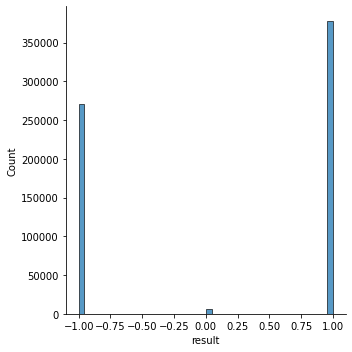

In [8]:
sns.displot(afl, x='result')

In [12]:
afl['year'] = pd.DatetimeIndex(afl['match_date']).year

In [15]:
afl.head()

,Unnamed: 0,venue_name,match_id,match_home_team,match_away_team,match_date,match_local_time,match_attendance,match_round,match_home_team_goals,...,rating_points,ruck_contests,score_launches,shots_at_goal,spoils,subbed,player_position,score_difference,result,year
0,1,Brunswick St,1,Fitzroy,Carlton,1897-05-08,15:00:00,3000,1,6,...,NaN,NaN,NaN,NaN,NaN,Not Subbed,NaN,33,1,1897
1,2,Brunswick St,1,Fitzroy,Carlton,1897-05-08,15:00:00,3000,1,6,...,NaN,NaN,NaN,NaN,NaN,Not Subbed,NaN,33,1,1897
2,3,Brunswick St,1,Fitzroy,Carlton,1897-05-08,15:00:00,3000,1,6,...,NaN,NaN,NaN,NaN,NaN,Not Subbed,NaN,33,1,1897
3,4,Brunswick St,1,Fitzroy,Carlton,1897-05-08,15:00:00,3000,1,6,...,NaN,NaN,NaN,NaN,NaN,Not Subbed,NaN,33,1,1897
4,5,Brunswick St,1,Fitzroy,Carlton,1897-05-08,15:00:00,3000,1,6,...,NaN,NaN,NaN,NaN,NaN,Not Subbed,NaN,33,1,1897


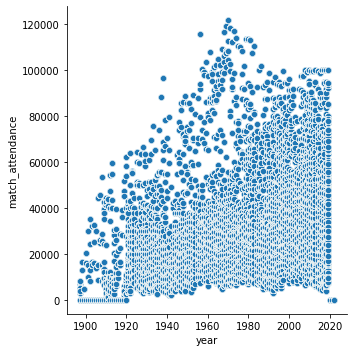

In [16]:
sns.relplot(data=afl, x='year', y='match_attendance')